# GA Data Science 16 (DAT16) - Lab 17 a

### Time Series Analysis

Francesco Mosconi, Justin Breucop

### Today

In [1]:
%pylab inline
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


## Sound Analysis

In [2]:
from scipy.io import wavfile
fs, data = wavfile.read('./Time Series Audio.wav')

/Users/francescomosconi/anaconda/lib/python2.7/site-packages/scipy/io/wavfile.py:179: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [3]:
mono = data[:,1]
T = len(mono)/44100.0
t = np.linspace(0,T, len(mono))

display the spectrogram

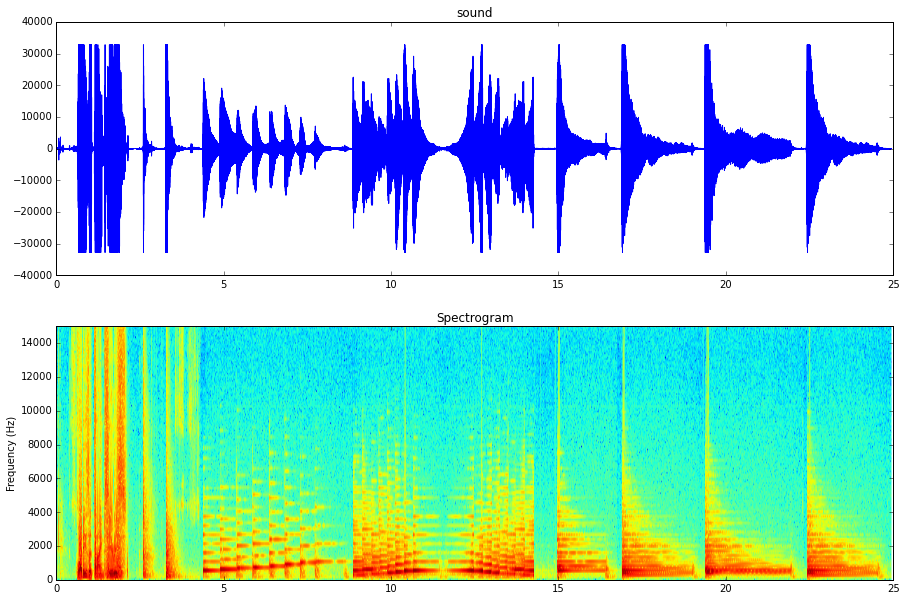

In [4]:
figure(figsize = (15,10))
subplot(211)
plot(t,mono)
title("sound")

subplot(212)
# the specgram function already outputs a plot
_ = specgram(mono, Fs = 44100, NFFT=512)
ylim(0,15000)
title("Spectrogram")
ylabel("Frequency (Hz)")

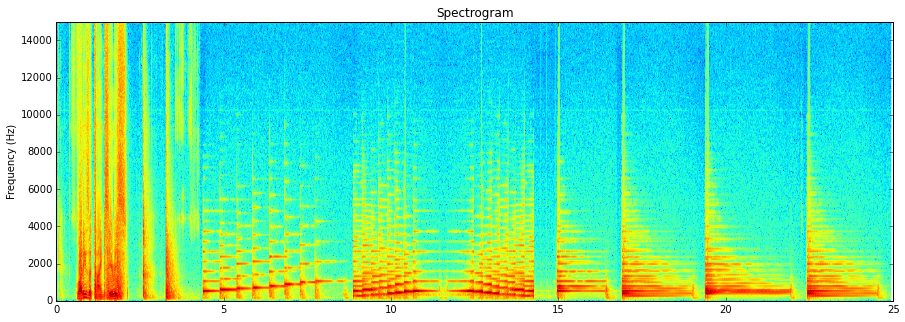

In [5]:
figure(figsize = (15,5))
# change the resolution of the specgram
_ = specgram(mono, Fs = 44100, NFFT=1024)
ylim(0,15000)
title("Spectrogram")
ylabel("Frequency (Hz)")

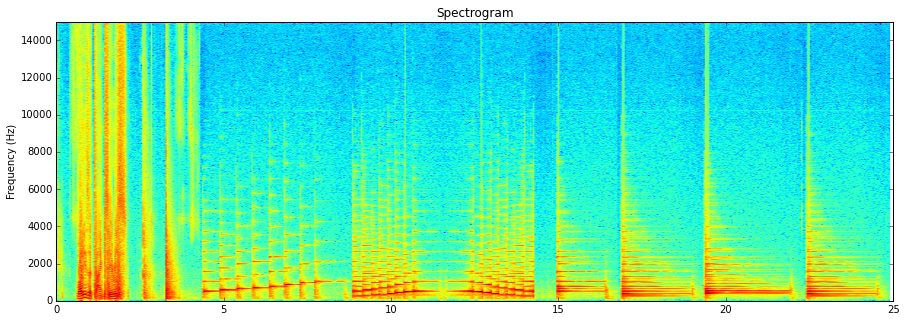

In [6]:
figure(figsize = (15,5))
_ = specgram(mono, Fs = 44100, NFFT=2048)
ylim(0,15000)
title("Spectrogram")
ylabel("Frequency (Hz)")

## random data

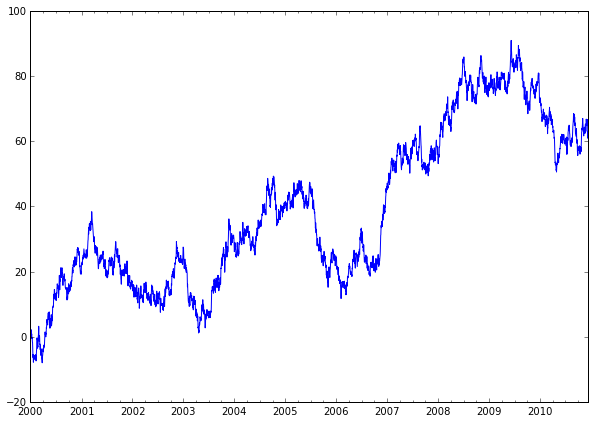

In [9]:
figure(figsize = (10,7))
ts = pd.Series(randn(4000), index=pd.date_range('1/1/2000', periods=4000))
ts = ts.cumsum()
ts.plot()

## fancy plotting

In [10]:
from pandas.tools.plotting import lag_plot

In [11]:
corrts = pd.Series(0.2 * rand(1000) + 0.8 * np.sin(np.linspace(-99 * np.pi, 99 * np.pi, num=1000)))

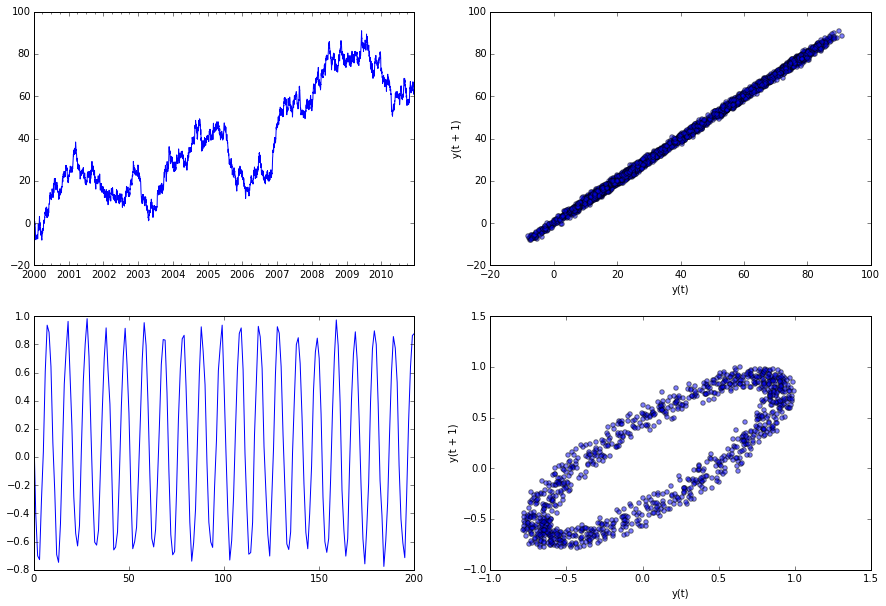

In [12]:
figure(figsize = (15,10))
subplot(221)
ts.plot()
subplot(222)
lag_plot(ts, alpha = 0.5)
subplot(223)
corrts.ix[0:200].plot()

subplot(224)
lag_plot(corrts, alpha = 0.5)


In [13]:
from pandas.tools.plotting import autocorrelation_plot

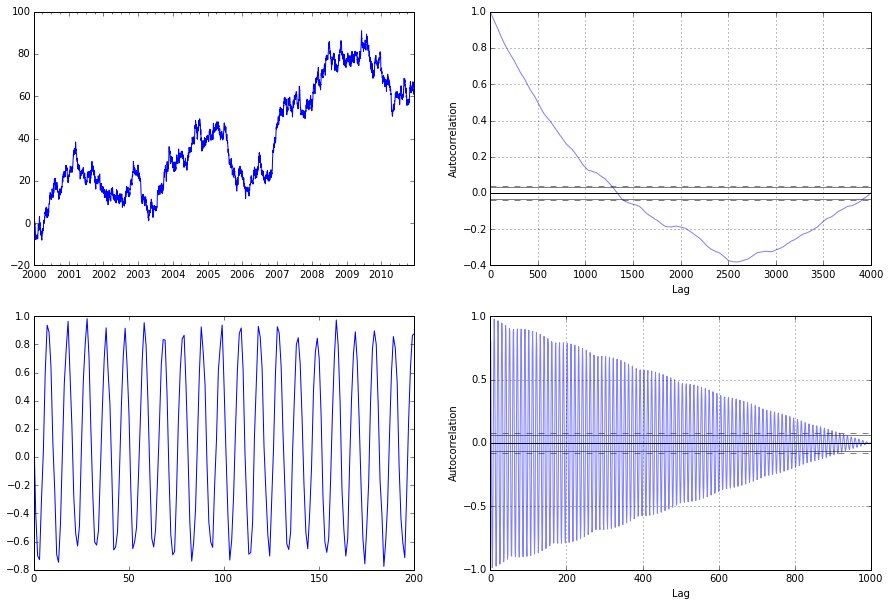

In [14]:
figure(figsize = (15,10))
subplot(221)
ts.plot()
ax = subplot(222)
autocorrelation_plot(ts, alpha = 0.5, ax = ax)
subplot(223)
corrts.ix[0:200].plot()

ax1= subplot(224)
autocorrelation_plot(corrts, alpha = 0.5, ax = ax1)


In [15]:
import bokeh.sampledata
bokeh.sampledata.download()

Using data directory: /Users/francescomosconi/.bokeh/data
Downloading: CGM.csv (1589982 bytes)
   1589982 [100.00%]
Downloading: US_Counties.zip (3182088 bytes)
   3182088 [100.00%]
Unpacking: US_Counties.csv
Downloading: unemployment09.csv (253301 bytes)
    253301 [100.00%]
Downloading: AAPL.csv (166698 bytes)
    166698 [100.00%]
Downloading: FB.csv (9706 bytes)
      9706 [100.00%]
Downloading: GOOG.csv (113894 bytes)
    113894 [100.00%]
Downloading: IBM.csv (165625 bytes)
    165625 [100.00%]
Downloading: MSFT.csv (161614 bytes)
    161614 [100.00%]
Downloading: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.zip (5148539 bytes)
   5148539 [100.00%]
Unpacking: WPP2012_SA_DB03_POPULATION_QUINQUENNIAL.csv



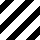
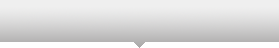
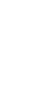
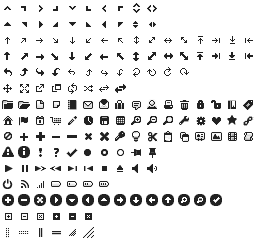
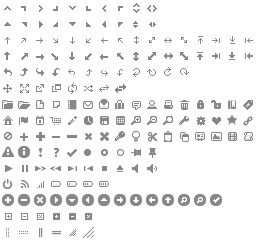
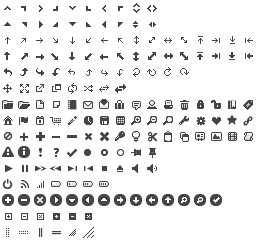
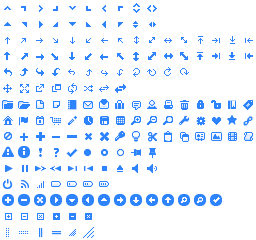
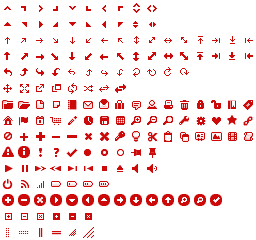
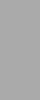
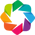
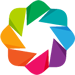
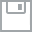
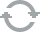
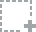
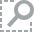
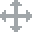
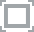
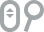

In [16]:
from bokeh.sampledata.stocks import MSFT
import bokeh.plotting as bh
bh.output_notebook()

In [17]:
df = pd.DataFrame(MSFT)[:50]
df["date"] = pd.to_datetime(df["date"])

mids = (df.open + df.close)/2
spans = abs(df.close-df.open)

inc = df.close > df.open
dec = df.open > df.close
w = 12*60*60*1000 # half day in ms


p = bh.figure(x_axis_type="datetime", tools='', plot_width=1000)

p.segment(df.date, df.high, df.date, df.low, color="black", toolbar_location="left")
p.rect(df.date[inc], mids[inc], w, spans[inc], fill_color="#D5E1DD", line_color="black")
p.rect(df.date[dec], mids[dec], w, spans[dec], fill_color="#F2583E", line_color="black")

p.title = "MSFT Candlestick"
p.xaxis.major_label_orientation = pi/4
p.grid.grid_line_alpha=0.3
bh.show(p)

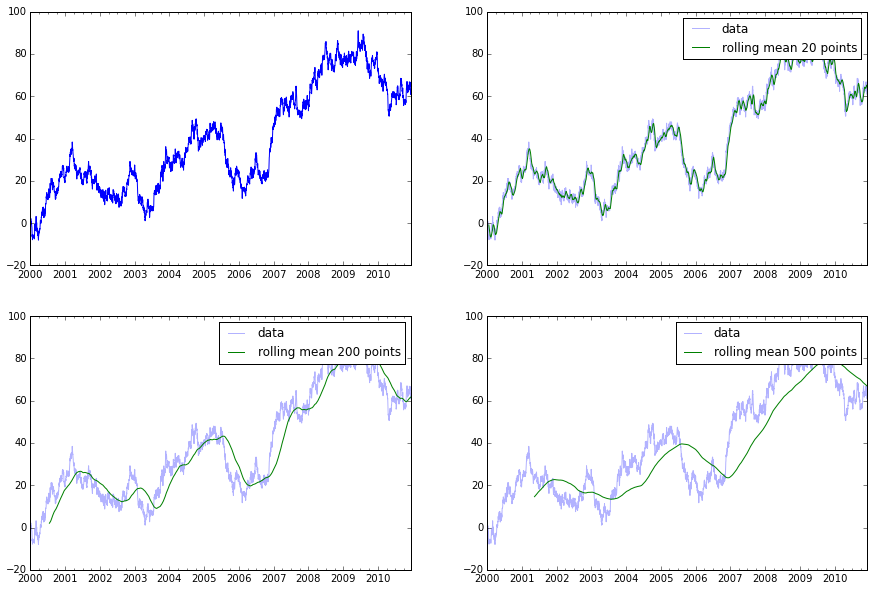

In [18]:
figure(figsize = (15,10))
subplot(221)
ts.plot()

subplot(222)
ts.plot(alpha = 0.3)

pd.rolling_mean(ts, 20).plot(alpha = 1.0)
legend(['data','rolling mean 20 points'])

subplot(223)
ts.plot(alpha = 0.3)

pd.rolling_mean(ts, 200).plot(alpha = 1.0)
legend(['data','rolling mean 200 points'])

subplot(224)
ts.plot(alpha = 0.3)

pd.rolling_mean(ts, 500).plot(alpha = 1.0)
legend(['data','rolling mean 500 points'])


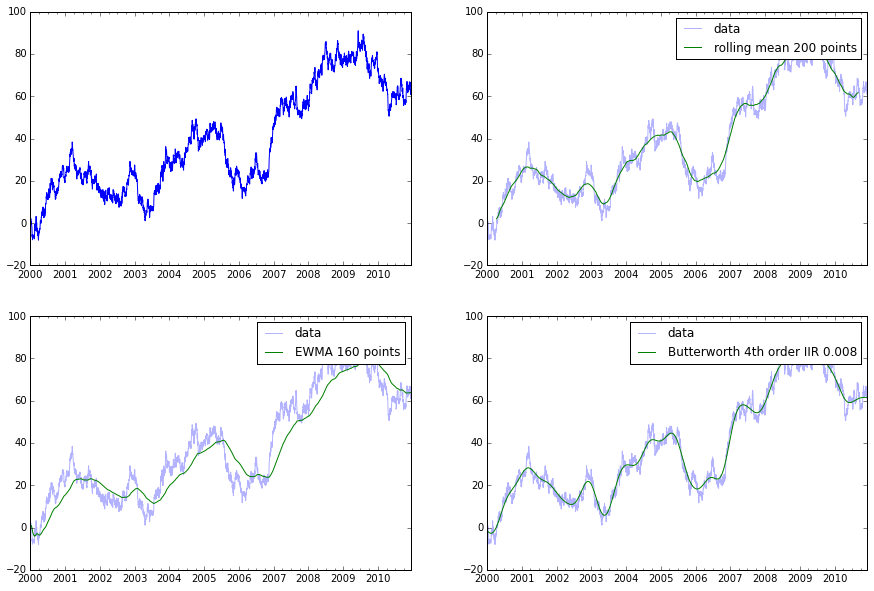

In [19]:
from scipy.signal import butter, filtfilt

figure(figsize = (15,10))
subplot(221)
ts.plot()

subplot(222)
ts.plot(alpha = 0.3)

pd.rolling_mean(ts, 200, center = True).plot(alpha = 1.0)
legend(['data','rolling mean 200 points'])

subplot(223)
ts.plot(alpha = 0.3)

pd.stats.moments.ewma(ts, 160).plot(alpha = 1.0)
legend(['data','EWMA 160 points'])

subplot(224)
ts.plot(alpha = 0.3)

pd.Series(data = filtfilt(*butter(4,0.008,'low'), x = ts.values), index = ts.index).plot(alpha = 1.0)
legend(['data','Butterworth 4th order IIR 0.008'])


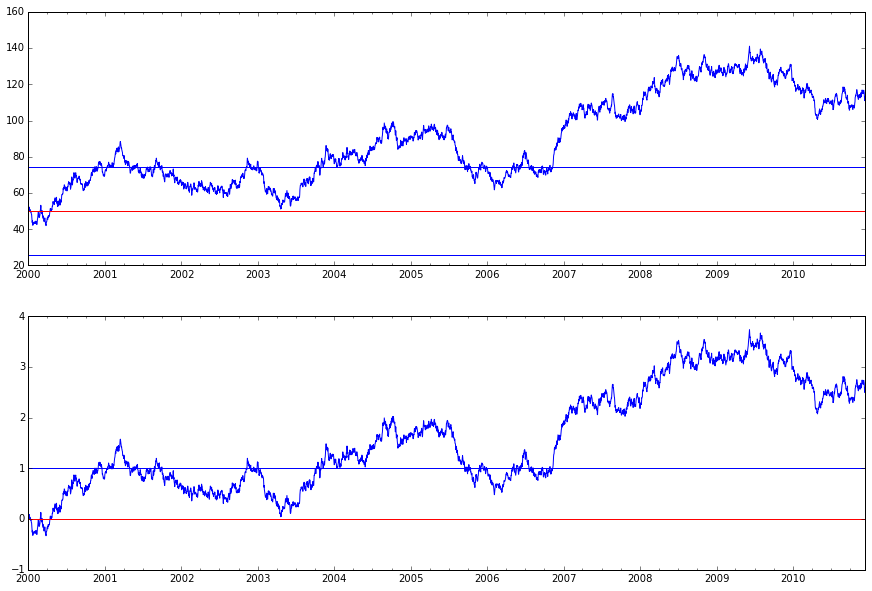

In [20]:
figure(figsize = (15,10))
subplot(211)
(ts+50).plot()
axhline(50, color = 'r')
axhline(50+ts.std())
axhline(50-ts.std())

subplot(212)
(ts/ts.std()).plot()
axhline(0, color = 'r')
axhline(1)
axhline(-1)

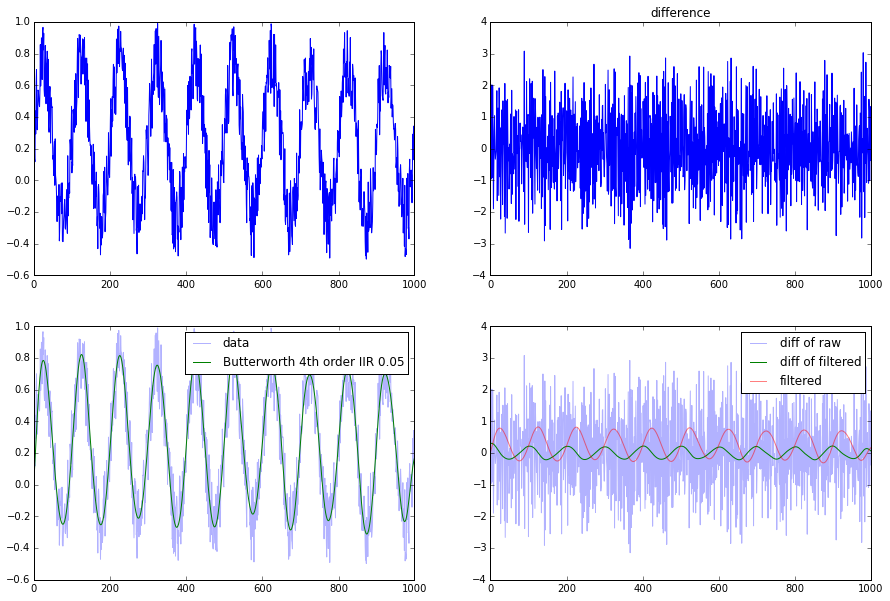

In [23]:
ttt = np.linspace(0, 10, num=1000)
noisysine = pd.Series(0.5 * rand(1000) + 0.5 * np.sin(2*pi*ttt))

figure(figsize = (15,10))
subplot(221)
noisysine.plot()

subplot(222)
(noisysine.diff()*2*pi).plot()
title('difference')

subplot(223)
noisysine.plot(alpha = 0.3)
filtered = pd.Series(data = filtfilt(*butter(4,0.05,'low'), x = noisysine.values), index = noisysine.index)
filtered.plot(alpha = 1.0)
legend(['data','Butterworth 4th order IIR 0.05'])

subplot(224)
(noisysine.diff()*2*pi).plot(alpha = 0.3)
(filtered.diff()*2*pi).plot(alpha = 1.0)
filtered.plot(alpha = 0.5)

legend(['diff of raw', 'diff of filtered', 'filtered'])